# **Data Visualizations**

In [7]:
import pandas as pd

# We'll start by creating a random df 
data = {
    'users': [145678, 105678, 85678, 75678,55678, 45678],
    'career_levels': ['Experienced', 'Manager', 'Senior executive', 'Executive', 'Entry level', 'Student']
}

df = pd.DataFrame(data)

# Displaying the DataFrame
print(df)

    users     career_levels
0  145678       Experienced
1  105678           Manager
2   85678  Senior executive
3   75678         Executive
4   55678       Entry level
5   45678           Student


## Barchart

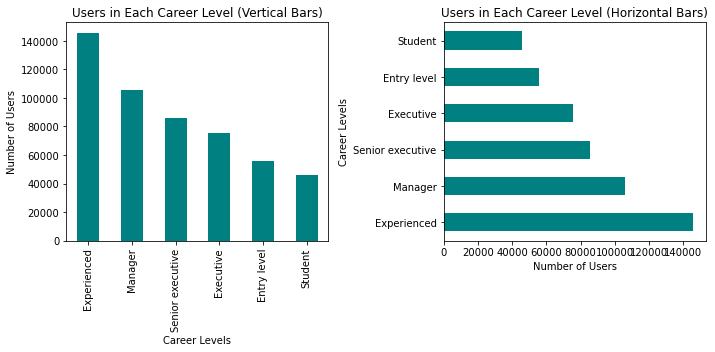

In [23]:
#Barchart displaying how many users belong to each class of exeperience in a Job platform

# Creating subplots with two side-by-side axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Bar chart - Vertical Bars
df.plot(kind='bar', x='career_levels', y='users', legend=False, color='teal', ax=axes[0])
axes[0].set_title('Users in Each Career Level (Vertical Bars)')
axes[0].set_xlabel('Career Levels')
axes[0].set_ylabel('Number of Users')

# Horizontal Bar chart
df.plot(kind='barh', x='career_levels', y='users', legend=False, color='teal', ax=axes[1])
axes[1].set_title('Users in Each Career Level (Horizontal Bars)')
axes[1].set_xlabel('Number of Users')
axes[1].set_ylabel('Career Levels')

plt.tight_layout() 
plt.show()

## Lollipop charts
### Another version of barcharts

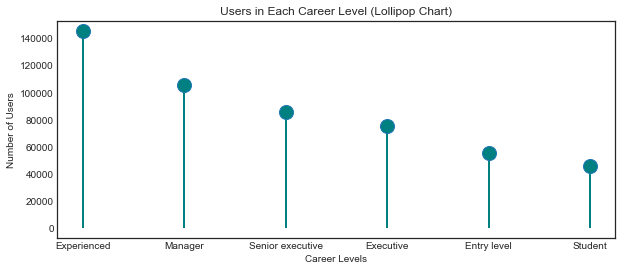

In [39]:
# Create a lollipop chart
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the figsize as needed

# Plotting the stems with wider stems and larger markers
markerline, stemline, baseline = ax.stem(df['career_levels'], df['users'], linefmt='teal', basefmt=' ', markerfmt='o', use_line_collection=True)

# Adjusting the size of the markers and width of the stems
markerline.set_markerfacecolor('teal')
markerline.set_markersize(14)
stemline.set_linewidth(2)  # Adjust the linewidth as needed

# Setting labels and title
ax.set_title('Users in Each Career Level (Lollipop Chart)')
ax.set_xlabel('Career Levels')
ax.set_ylabel('Number of Users')

plt.show()

## Pached Bubble chart
### This could be another wayt to represent similar results, where the size and colour of the bubble depends on the amount of users per clareer class

In [19]:
#pip install plotly

In [18]:
import plotly.express as px

teal_palette = ['#008080', '#009393', '#00A6A6', '#00B9B9', '#00CCCC']

# Create the packed bubble chart
fig = px.scatter(df, x='career_levels', y='users', size='users', color='users',
                 color_continuous_scale='Teal', opacity=0.7, hover_name='career_levels')

fig.update_traces(
    marker=dict(color=df['users'], colorscale=teal_palette, line=dict(color='black', width=1))
)

fig.update_layout(
    title='Users per User Career Level (Packed Bubble Chart)',
    xaxis=dict(title='User Career Level'),
    yaxis=dict(title='Users'),
    plot_bgcolor='white',   # Set the background color to white
    paper_bgcolor='white',  # Set the paper background color to white
    xaxis_gridcolor='black',  # Set the gridline color for the x-axis
    yaxis_gridcolor='black'   # Set the gridline color for the y-axis
)

fig.show()

## Pie chart
### In this case, this chart can be used to represent users belonging to each career level as % of the whole userbase.

In [22]:
total_users = df['users'].sum()

# Create the pie chart
fig = px.pie(values=df['users'], names=df['career_levels'],
             color=df['career_levels'], color_discrete_sequence=px.colors.sequential.Teal,
             title='Distribution of career level (Total Users: {})'.format(total_users))

# Update the textinfo property to show the age classes
fig.update_traces(textinfo='label+percent')

# Show the chart
fig.show()

## Line chart
### This visual is very handy to display trends in data over a period. 
### As an example, we can create some data of clicks to a certain platform over time

In [42]:
# We'll start by creating a random df 
data = {
    'CLICKS': [100000, 105678, 115678, 119678, 120678, 121678, 122765, 125567, 120543, 126733, 128341, 125543],
    'Months': ['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10','2022-11', '2022-12']
}

df1 = pd.DataFrame(data)

# Displaying the DataFrame
print(df1)

    CLICKS   Months
0   100000  2022-01
1   105678  2022-02
2   115678  2022-03
3   119678  2022-04
4   120678  2022-05
5   121678  2022-06
6   122765  2022-07
7   125567  2022-08
8   120543  2022-09
9   126733  2022-10
10  128341  2022-11
11  125543  2022-12


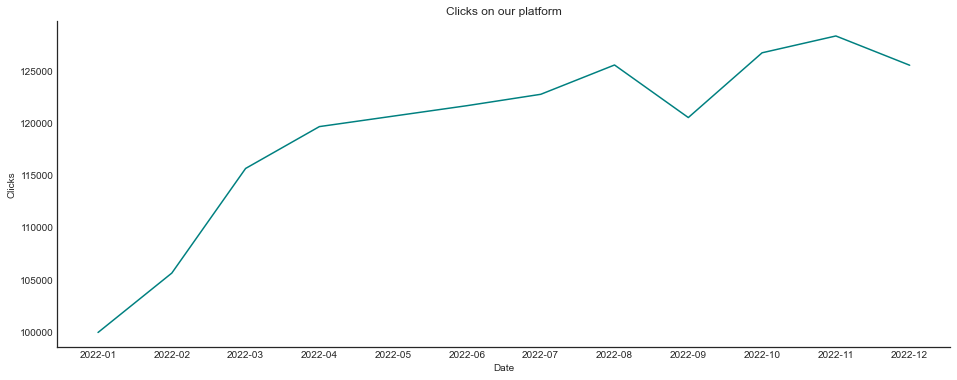

In [48]:
import matplotlib.pyplot as plt

df_sorted = df1.sort_values('Months')

# Set the figure size
plt.figure(figsize=(16, 6))

# Plot the line chart
plt.plot(df_sorted['Months'], df_sorted['CLICKS'], color='teal')

# Set the title and labels
plt.title('Clicks over Time')
plt.xlabel('Date')
plt.ylabel('Clicks')

# Set the plot style to remove the frame
plt.style.use('seaborn-white')

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show only the left and bottom spines
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

# Set the tick parameters
plt.tick_params(left=True, bottom=True)

# Set the title and labels
plt.title('Clicks on our platform')
plt.xlabel('Date')
plt.ylabel('Clicks')

# Show the plot
plt.show()

In [47]:
### It could be also usefull to add a linear trend to see where data are heading

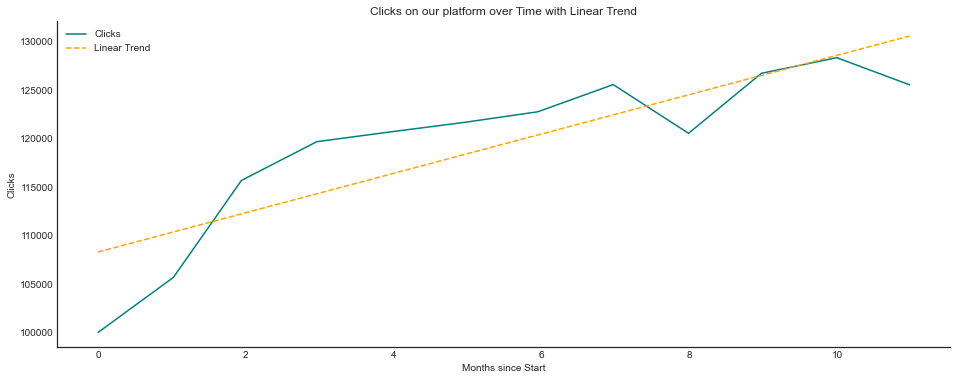

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Assuming df_sorted is the DataFrame you created earlier
# Sort the DataFrame by 'Months'
df_sorted = df_sorted.sort_values('Months')

# Convert 'Months' column to datetime objects
df_sorted['Months'] = pd.to_datetime(df_sorted['Months'])

# Calculate the number of months since the minimum date
min_date = df_sorted['Months'].min()
df_sorted['Months_numeric'] = (df_sorted['Months'] - min_date) / np.timedelta64(1, 'M')

# Set the figure size
plt.figure(figsize=(16, 6))

# Plot the line chart
plt.plot(df_sorted['Months_numeric'], df_sorted['CLICKS'], color='teal', label='Clicks')

# Calculate and plot the linear trend
linear_trend = np.polyfit(df_sorted['Months_numeric'], df_sorted['CLICKS'], 1)
linear_trend_line = np.poly1d(linear_trend)
plt.plot(df_sorted['Months_numeric'], linear_trend_line(df_sorted['Months_numeric']), color='orange', linestyle='--', label='Linear Trend')

# Set the title and labels
plt.title('Clicks on our platform over Time with Linear Trend')
plt.xlabel('Months since Start')
plt.ylabel('Clicks')

# Set the plot style to remove the frame
plt.style.use('seaborn-white')

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show only the left and bottom spines
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

# Set the tick parameters
plt.tick_params(left=True, bottom=True)

# Show legend
plt.legend()

# Show the plot
plt.show()


## Visualisation for group testing
### This type of graph can be very useful when running AB tests or experiments in general

In [22]:
#first, we need to load the data, which we previously created randomly.

import pandas as pd
data = pd.read_csv('/Users/lucarugiu/Desktop/Git_portfolio/groups.csv')
data.head()

,WEEK_ID,TEST_GROUP,Users
0,202101,Group 1,80889
1,202102,Group 1,81494
2,202103,Group 1,82376
3,202104,Group 1,82249
4,202105,Group 1,82811


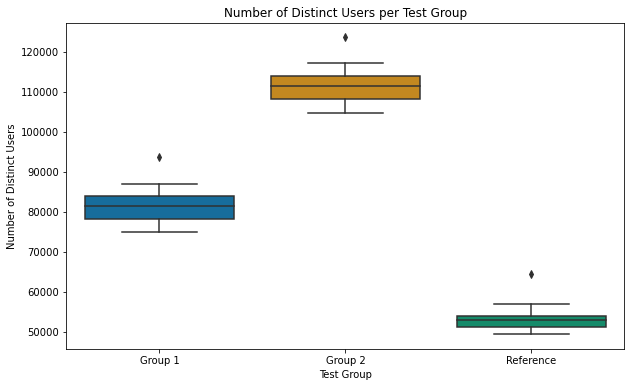

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with columns WEEK_ID, TEST_GROUP, and Users

# Count distinct users per TEST_GROUP
user_counts = data.groupby('TEST_GROUP')['Users'].nunique()

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='TEST_GROUP', y='Users', data=data, palette='colorblind')

# Set the title and labels
plt.title('Number of Distinct Users per Test Group')
plt.xlabel('Test Group')
plt.ylabel('Number of Distinct Users')

# Show the plot
plt.show()

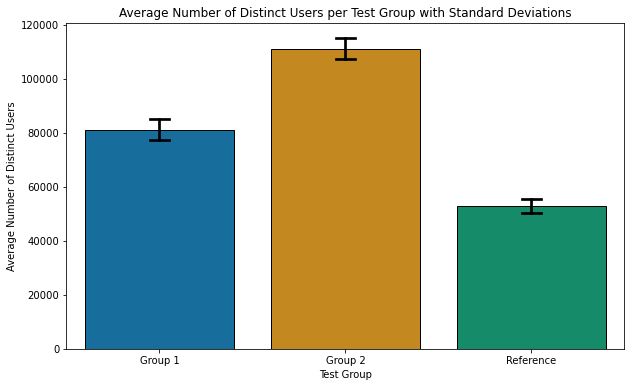

In [24]:
# Calculate average count distinct users per TEST_GROUP
avg_user_counts = data.groupby('TEST_GROUP')['Users'].nunique().mean()
std_user_counts = data.groupby('TEST_GROUP')['Users'].nunique().std()

# Create a bar chart with error bars (standard deviations) and black edges
plt.figure(figsize=(10, 6))
sns.barplot(x='TEST_GROUP', y='Users', data=data, palette='colorblind', ci='sd', errcolor='black', capsize=0.1, edgecolor='black')

# Set the title and labels
plt.title('Average Number of Distinct Users per Test Group with Standard Deviations')
plt.xlabel('Test Group')
plt.ylabel('Average Number of Distinct Users')

# Show the plot
plt.show()

## Histograms for distributions

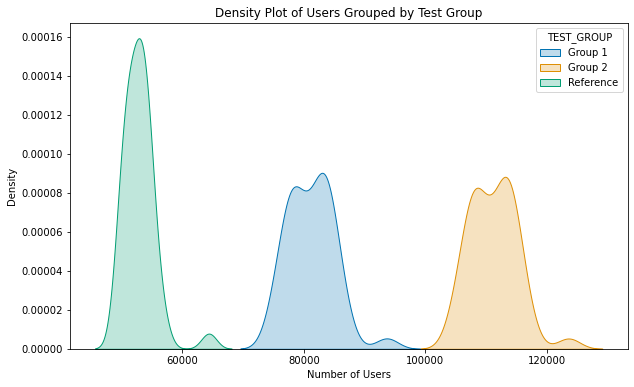

In [25]:
# Create a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Users', hue='TEST_GROUP', fill=True, common_norm=False, palette='colorblind')

# Set the title and labels
plt.title('Density Plot of Users Grouped by Test Group')
plt.xlabel('Number of Users')
plt.ylabel('Density')

# Show the plot
plt.show()